# Demonstration of ROI INCONSISTENCY between ROIs generated by CellPose and FIJI

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cellpose import utils, io, plot, models
mpl.rcParams['figure.dpi'] = 200
from scipy.ndimage import binary_fill_holes
import matplotlib.image as mpimg
import os
import pandas as pd

# Image of interest
#### Arrow pointing at cell I'm trying to get the fluoresence of

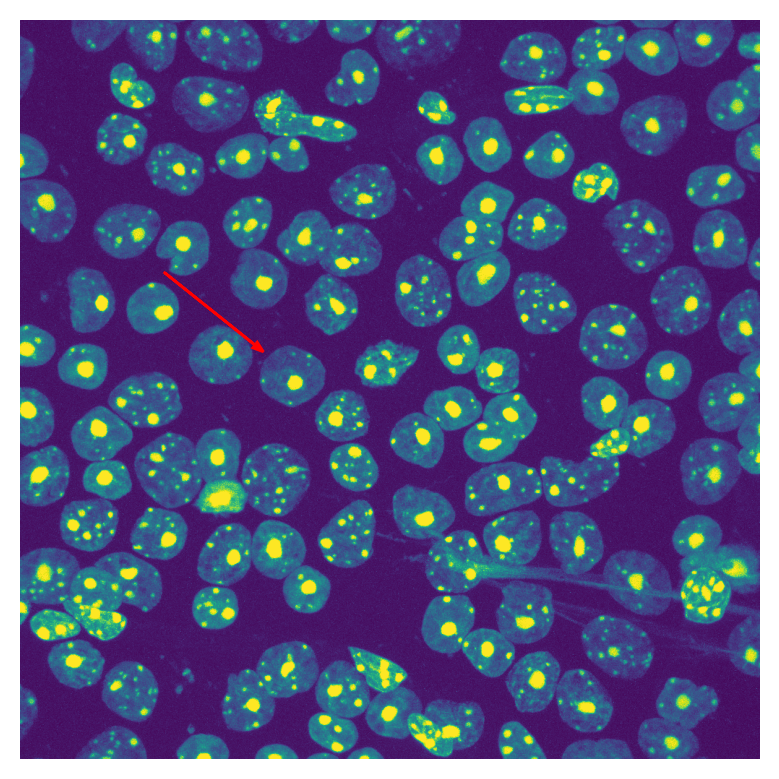

In [19]:
img_path = 'ROI_Incon_Files/new_2007R_DAPI_proj1.tif'
image = io.imread(img_path)
plt.imshow(image)
plt.axis('off')
plt.arrow(200,350,125,100, head_width = 10,  color = 'red')

# Sum Pixel Intensity generated directly from CellPose

In [20]:
segpy_path = 'ROI_Incon_Files/new_2007R_DAPI_proj1_seg.npy'
dat = np.load(segpy_path, allow_pickle=True).item()

(-0.5, 1023.5, 1023.5, -0.5)

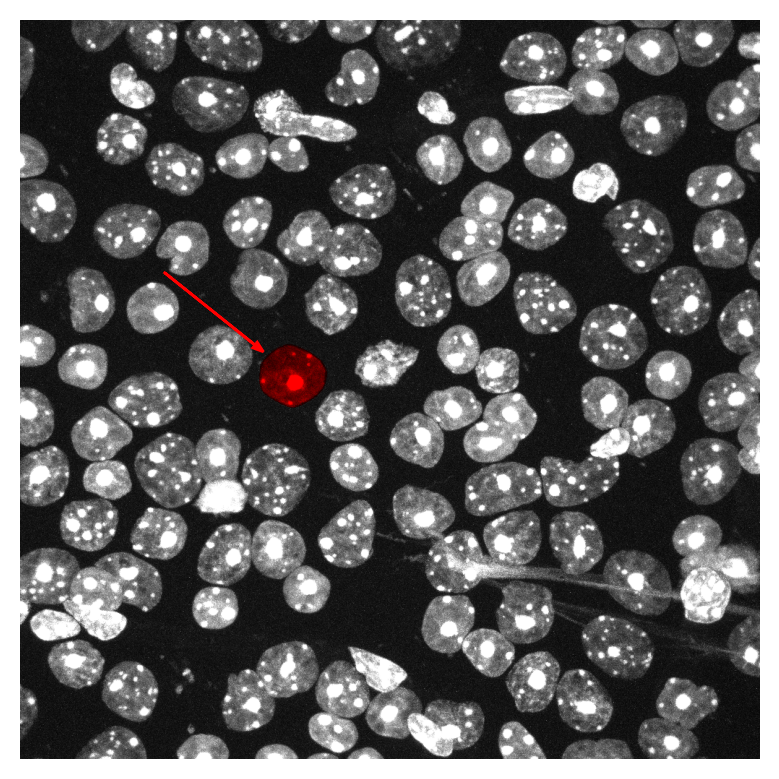

In [21]:
overlay = plot.mask_overlay(image, dat['masks'])
plt.imshow(overlay)
plt.arrow(200,350,125,100, head_width = 10,  color = 'red')
plt.axis('off')

In [22]:
print('Summed Pixel Intensity from mask:', np.sum(image[dat['masks'].astype(bool)]))

Summed Pixel Intensity from mask: 465983


# Sum Pixel Intensity generated from FIJI

(-0.5, 2425.5, 1199.5, -0.5)

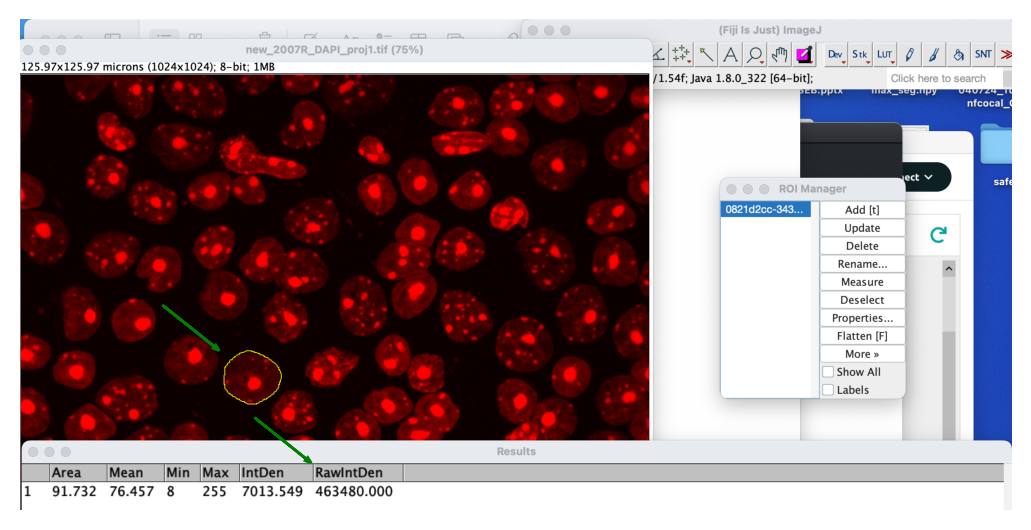

In [23]:
img = mpimg.imread('ROI_Incon_Files/FIJI_Screenshot.png')
imgplot = plt.imshow(img)
plt.arrow(350,700,125,100, head_width = 10,  color = 'green')
plt.arrow(575,975,125,100, head_width = 10,  color = 'green')
plt.axis('off')

RawIntDen is the sum of all pixel values in the ROI (region of interest)

In [24]:
# CellPose Calculation versus FIJI
print('Difference', 465983 - 463480)
print('Percent Difference', 465983/463480)

Difference 2503
Percent Difference 1.0054004487788037


# Checking if I'm working with the same image here in Python versus in FIJI

In [25]:
# data from .txt in FIJI
file_path = 'ROI_Incon_Files/new_2007R_DAPI_proj1.txt'

# Load the data into a NumPy array
data = np.loadtxt(file_path, delimiter='\t')

# Print the array to verify
print(data)
print('Sum of all the pixels:', np.sum(data))

[[ 9. 19. 23. ... 14.  8. 10.]
 [23.  7.  7. ... 10.  6.  9.]
 [16. 11.  9. ... 11. 17.  6.]
 ...
 [12. 14.  6. ... 14. 17. 14.]
 [28. 16. 17. ... 17. 11. 16.]
 [17. 18. 15. ...  6. 17. 12.]]
Sum of all the pixels: 58847026.0


In [26]:
# data from image improted directly through CellPose
print(image)
print('Sum of all the pixels:', np.sum(image))

[[ 9 19 23 ... 14  8 10]
 [23  7  7 ... 10  6  9]
 [16 11  9 ... 11 17  6]
 ...
 [12 14  6 ... 14 17 14]
 [28 16 17 ... 17 11 16]
 [17 18 15 ...  6 17 12]]
Sum of all the pixels: 58847026


## Confirmed, I'm working with the same image based on the array values. Thus the difference lies in the ROI

(445.65, 541.35, 326.35, 428.65)

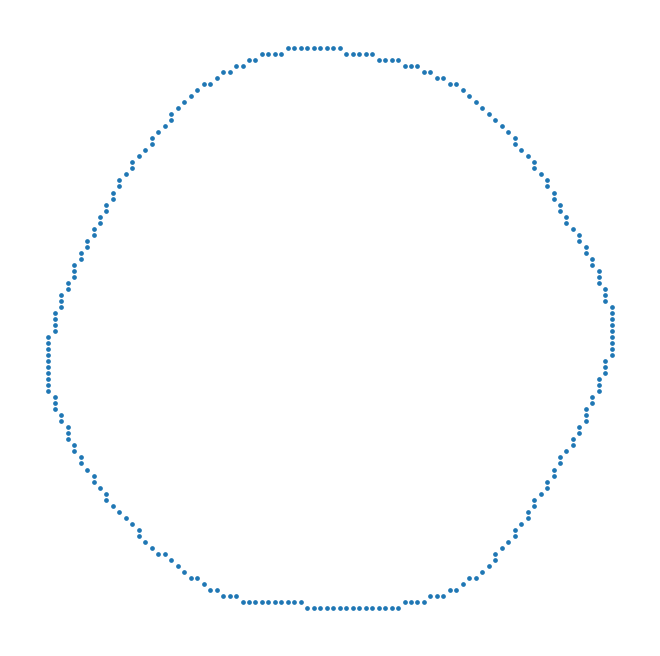

In [27]:
# I then read the ROI .zip file that Cellpose gives to FIJI

roi_path = 'ROI_Incon_Files/0821d2cc-3435-11ef-bbb0-8e9c6b00ca21.roi'
from read_roi import read_roi_file

roi = read_roi_file(roi_path)

x = roi['0821d2cc-3435-11ef-bbb0-8e9c6b00ca21']['x']
y = roi['0821d2cc-3435-11ef-bbb0-8e9c6b00ca21']['y']

plt.figure(figsize= (4,4))
plt.scatter(y,x, s = .5)
plt.axis('off')

### The ROI generated by FIJI looks like a freedrawn circle, the ROI perimeter is given in x,y coordinates.
This can be the problem since we don't know how FIJI is actually calculating the intensity values.
How FIJI calculates may not be as clean cut as what CellPose gets via a binary mask

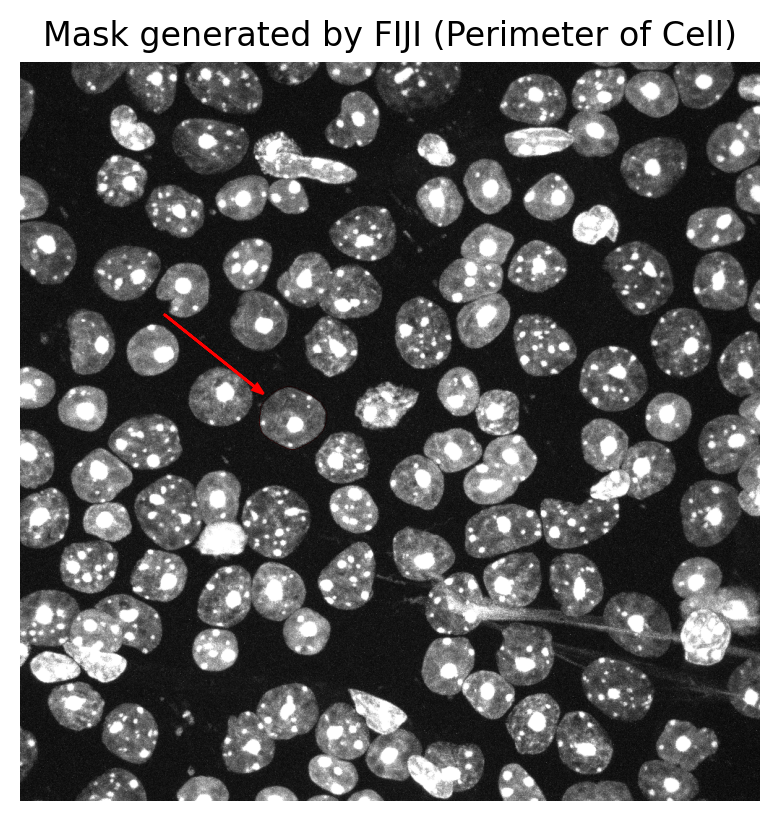

In [28]:
# Visualization of the ROI from FIJI

zero_array = np.zeros((1024,1024))

for coord in zip(y,x):
    zero_array[coord[0], coord[1]] = 1

plt.imshow(image)
plt.imshow(zero_array)

overlay = plot.mask_overlay(image, zero_array.astype(int))
plt.imshow(overlay)
plt.axis('off')
plt.title('Mask generated by FIJI (Perimeter of Cell)')
plt.arrow(200,350,125,100, head_width = 10,  color = 'red')

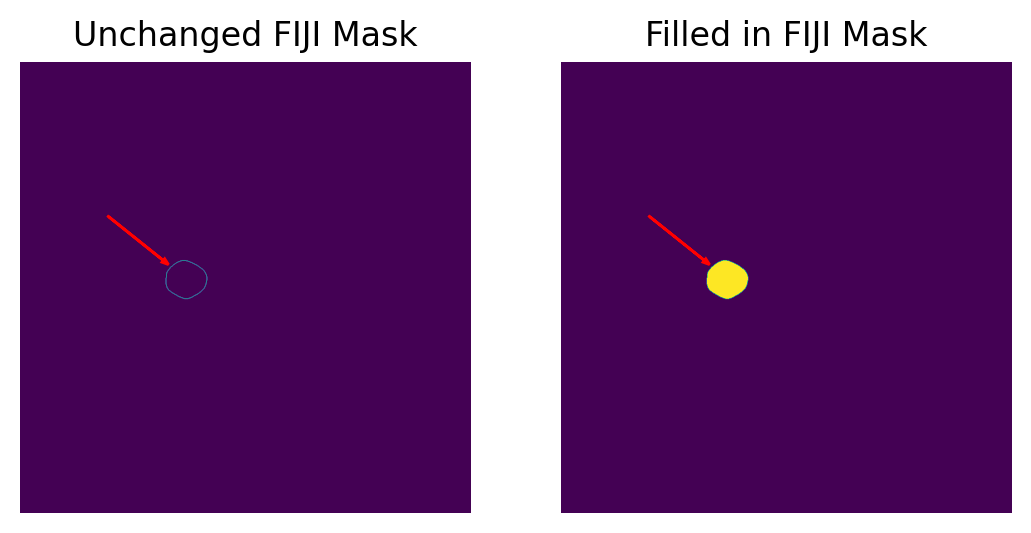

In [29]:
# Code to fill in that mask, since what's given is essentially the perimeter
# Fill the enclosed area in the matrix
filled_matrix = binary_fill_holes(zero_array).astype(int)


overlay = plot.mask_overlay(image, filled_matrix)


fig, (axs1, axs2) = plt.subplots(1,2, sharex = True, sharey=True)

axs1.imshow(zero_array)
axs1.axis('off')
axs1.set_title('Unchanged FIJI Mask')
axs1.arrow(200,350,125,100, head_width = 10,  color = 'red')

axs2.imshow(filled_matrix)
axs2.axis('off')
axs2.set_title('Filled in FIJI Mask')
axs2.arrow(200,350,125,100, head_width = 10,  color = 'red')


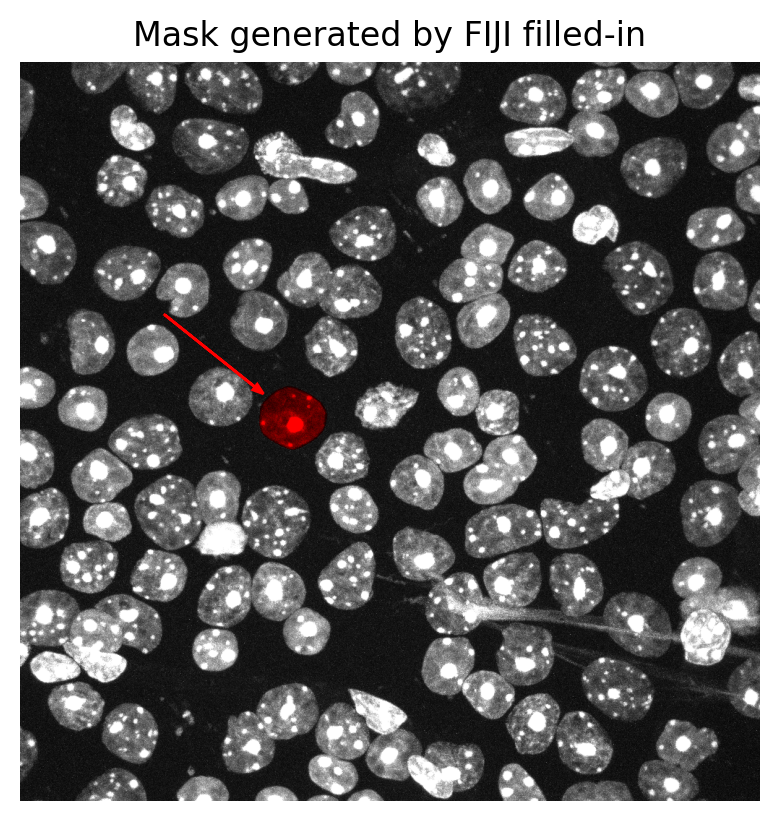

In [30]:
overlay = plot.mask_overlay(image, filled_matrix)
plt.imshow(overlay)
plt.axis('off')
plt.title('Mask generated by FIJI filled-in')
plt.arrow(200,350,125,100, head_width = 10,  color = 'red')

In [31]:
print('Summed intensity directly from CellPose Mask: ', np.sum(image[dat['masks'].astype(bool)]))

print('Summed intensity from filled FIJI mask:', np.sum(image[filled_matrix.astype(bool)]))

print('\nThere is no difference between pixel intensities generated \nfrom CellPose and the filled-in version of the FIJI mask')

Summed intensity directly from CellPose Mask:  465983
Summed intensity from filled FIJI mask: 465983

There is no difference between pixel intensities generated 
from CellPose and the filled-in version of the FIJI mask


# Conclusion:
FIJI calculation is imprecise and generating values from CellPose Mask is more consistent and the right way to go